In [1]:
# import all neccessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create quantum circuit
qr = QuantumRegister(1)
circuit_statevector = QuantumCircuit(qr)
circuit_statevector.h(0)

# get statevector using Statevector.from_instruction
statevector = Statevector.from_instruction(circuit_statevector)
array_to_latex(statevector)

<IPython.core.display.Latex object>

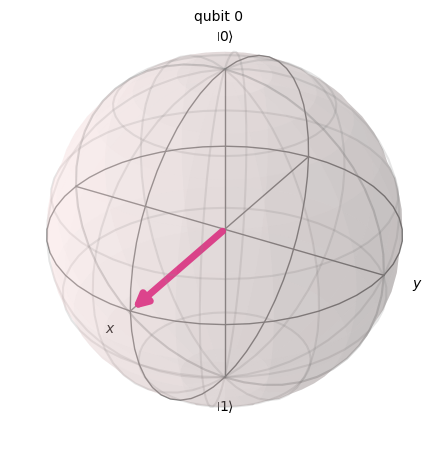

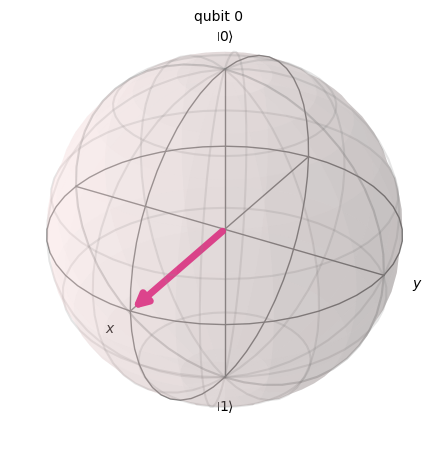

In [3]:
# plot the statevector on bloch sphere
plot_bloch_multivector(statevector)

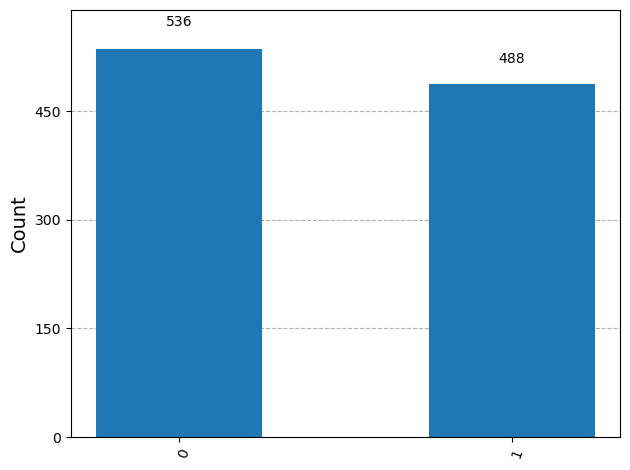

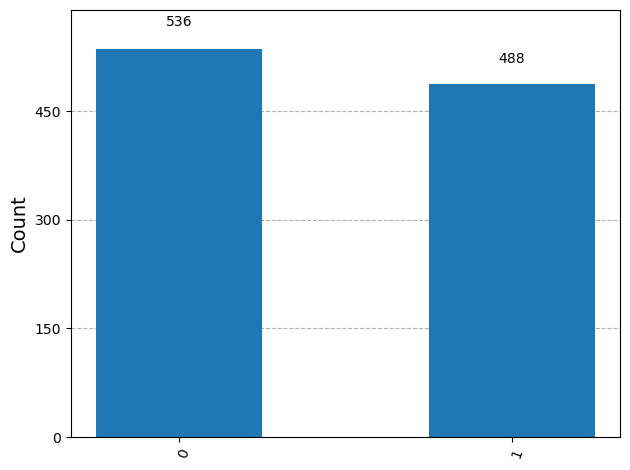

In [4]:
# circuit with measurements for histogram
cr = ClassicalRegister(1)
circuit_with_measurements = QuantumCircuit(qr, cr)
circuit_with_measurements.h(0)
circuit_with_measurements.measure(qr, cr)

# run simulation with 1000-plus shots and plot results
simulator = AerSimulator()
job = simulator.run(circuit_with_measurements, shots=1024)
result = job.result()
plot_histogram(result.get_counts())